# Rheological analysis of cellulose nanofiber hydrogel shear viscosity
 
This notebook demonstrates the use of the `pyRheo` library to fit the shear viscosity of a cellulose nanofiber (CNF) hydrogel. 
The experimental data includes shear rate (`gamma_dot`) and viscosity (`eta`) measurements, which are analyzed using a rheological model. The data is from . Y. Miranda-Valdez, M. Sourroubille, T. Mäkinen, J. G.
Puente-Córdova, A. Puisto, J. Koivisto and M. J. Alava, Cel-
lulose, 2024, 31, 1545–1558.

We import the following libraries:
- `pandas`: For handling the experimental data in tabular format.
- `numpy`: For numerical operations and transformations.
- `matplotlib.pyplot`: For creating detailed visualizations of the data and model predictions.
- `pyRheo.rotation_model.RotationModel`: To perform rheological model fitting and analysis of the viscosity data.


In [10]:
# Import required libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
from pyRheo.rotation_model import RotationModel  # For rheological modeling


# Load and inspect rheological data
This cell loads experimental data from a CSV file containing:
- Shear rate (`gamma_dot`) in [1/s].
- Viscosity (`eta`) in [Pa·s].
The data is loaded using `pandas` and the first few rows are displayed for verification.


In [11]:
# Load rheological data from a CSV file
# The file contains shear rate (gamma_dot) and viscosity (eta) data.
data = pd.read_csv('./data/cnf_hydrogel/rotation_cnf1_data.csv', delimiter='\t')

# Extract shear rate and viscosity as numpy arrays
gamma_dot = data['Shear Rate'].values
eta = data['Viscosity'].values

# Display the first few rows of the data for verification
data.head()


,Shear Rate,Viscosity
0,0.100,7348.000000
1,0.178,4264.943820
2,0.316,2478.449367
3,0.562,1436.049822
4,1.000,831.830000


# Initialize and fit the rheological model
In this cell:
1. The `RotationModel` class is instantiated with parameters for model fitting:
   - PowerLaw model.
   - Random initial guesses for optimization.
   - 64 guesses for the optimizer to explore.
   - The Nelder-Mead algorithm for minimization.
2. The model is fitted to the experimental data (`gamma_dot` and `eta`).
3. Fitted model parameters and error metrics are displayed.


In [12]:
# Initialize the rheological model with specific fitting parameters
model = RotationModel(
    model="PowerLaw",                   # Automatically selects the best model
    initial_guesses="random",       # Uses random initial guesses
    num_initial_guesses=64,         # Number of initial guesses for the optimizer
    minimization_algorithm="Nelder-Mead"  # Optimization algorithm
)

# Fit the model to the experimental data
model.fit(gamma_dot, eta)

# Print the fitted parameters and error metrics
model.print_parameters()  # Display model parameters
model.print_error()       # Display error of the fit


Best initial guess was: [1053.923634245724, 0.06135036154950868]
k: 832.3735963064794
n: 0.05354520878215306
RSS: 9.017034527853481e-05
Mean Percentage Error: 0.18%


# Generate and plot model fit
In this cell:
1. Predictions for viscosity are generated using the fitted model at logarithmically spaced shear rates.
2. The experimental data and model predictions are visualized using a quick plot from the `pyRheo` library.


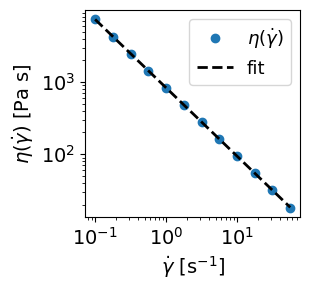

In [13]:
# Generate predictions using the fitted model for a smooth curve
gamma_dot_predict = np.logspace(np.min(np.log10(gamma_dot)), np.max(np.log10(gamma_dot)), 100)
eta_predict = model.predict(gamma_dot_predict)

# Plot the experimental data and the model prediction
model.plot(gamma_dot, eta, savefig=False)  # Quick overview plot


# Create a customized plot
This cell generates a detailed, publication-quality plot:
1. The experimental data and the model predictions are plotted together.
2. Both axes are set to logarithmic scales to represent the data more effectively.
3. Axis labels, legend, and tick font sizes are adjusted for readability.


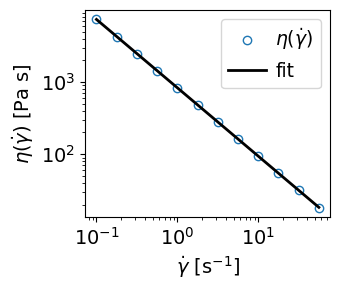

In [14]:
# Create a new figure with adjusted size for better visualization
plt.figure(figsize=(3.5, 3))

# Plot experimental data
plt.plot(gamma_dot, eta, 'o', markersize=6, markevery=1, alpha=1, fillstyle='none', label='$\eta(\dot{\gamma})$')

# Plot the model predictions
plt.plot(gamma_dot_predict, eta_predict, '-', color="k", lw=2, label='fit')

# Set logarithmic scales for both axes
plt.xscale("log")
plt.yscale("log")

# Customize axis labels, ticks, and font sizes
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel(r'$\dot{\gamma}$ [s$^{-1}$]', fontsize=14)
plt.ylabel(r'$\eta(\dot{\gamma})$ [Pa s]', fontsize=14)

# Add a legend with customized font size
plt.legend(fontsize=13.5, handletextpad=0.5)

# Final plot adjustments for readability
plt.grid(False)
plt.tight_layout()

# Display the plot
plt.show()
